In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

Dataset : https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Exploratory Data Analysis

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df['bmi'].fillna(int(df['bmi'].mean()), inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df2 = df.drop('id', axis=1)
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.0,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
#Change value in ever_married column
df2['ever_married'] = df2['ever_married'].replace(['No'],'0')
df2['ever_married'] = df2['ever_married'].replace(['Yes'],'1')
#Change value in work_type column
df2['work_type'] = df2['work_type'].replace(['children'],'0')
df2['work_type'] = df2['work_type'].replace(['Govt_job'],'1')
df2['work_type'] = df2['work_type'].replace(['Never_worked'],'2')
df2['work_type'] = df2['work_type'].replace(['Private'],'3')
df2['work_type'] = df2['work_type'].replace(['Self-employed'],'4')
#Change value in Residence_type column
df2['Residence_type'] = df2['Residence_type'].replace(['Rural'],'0')
df2['Residence_type'] = df2['Residence_type'].replace(['Urban'],'1')
#Change value in smoking_status column
df2['smoking_status'] = df2['smoking_status'].replace(['never smoked'],'0')
df2['smoking_status'] = df2['smoking_status'].replace(['formerly smoked'],'1')
df2['smoking_status'] = df2['smoking_status'].replace(['smokes'],'2')
df2['smoking_status'] = df2['smoking_status'].replace(['Unknown'],'3')
#Change value in gender column
df2['gender'] = df2['gender'].replace(['Female'],'0')
df2['gender'] = df2['gender'].replace(['Male'],'1')
df2['gender'] = df2['gender'].replace(['Other'],'2')
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,3,1,228.69,36.6,1,1
1,0,61.0,0,0,1,4,0,202.21,28.0,0,1
2,1,80.0,0,1,1,3,0,105.92,32.5,0,1
3,0,49.0,0,0,1,3,1,171.23,34.4,2,1
4,0,79.0,1,0,1,4,0,174.12,24.0,0,1


In [ ]:
#convert object data types column to integer
df2['gender'] = pd.to_numeric(df2['gender'])
df2['ever_married'] = pd.to_numeric(df2['ever_married'])
df2['work_type'] = pd.to_numeric(df2['work_type'])
df2['Residence_type'] = pd.to_numeric(df2['Residence_type'])
df2['smoking_status'] = pd.to_numeric(df2['smoking_status'])
df2.dtypes

gender                 int64
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


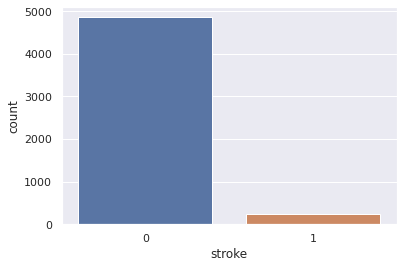

In [ ]:
#Counting 1 and 0 Value in stroke column
sns.countplot(df2['stroke'])

#Oversampling data

In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = df2[(df2['stroke']==0)] 
df_minority = df2[(df2['stroke']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 4861, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


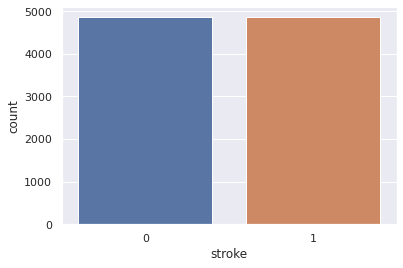

In [ ]:
sns.countplot(df_upsampled['stroke'])

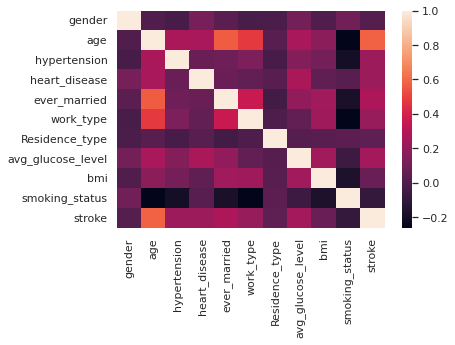

In [ ]:
sns.heatmap(df_upsampled.corr(), fmt='.2g')

#Build Machine Learning Model

In [ ]:
X = df_upsampled.drop('stroke', axis=1)
y = df_upsampled['stroke']

In [ ]:
#test size 20% and train size 80%
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=7)

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = dtree.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 96.25 %


#XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 83.6 %


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 98.92 %


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 77.48 %


Visualize XGBoost and Logistic Regression

In [ ]:
#importing classification report and confussion maatrix from sklearn
from sklearn.metrics import classification_report, confusion_matrix

#XGBoost

In [ ]:
y_pred = xgb.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.89      0.77      0.83       988
           1       0.79      0.90      0.84       957

    accuracy                           0.84      1945
   macro avg       0.84      0.84      0.84      1945
weighted avg       0.84      0.84      0.84      1945



Text(0.5, 1.0, 'Accuracy Score: 83.59897172236504')

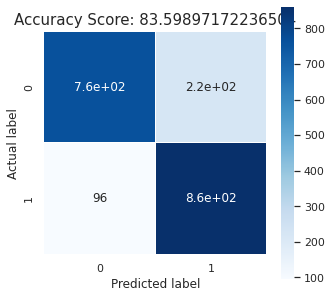

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(xgb.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

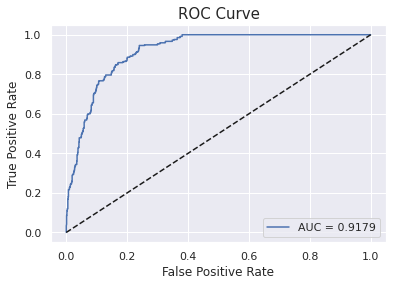

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = xgb.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

[0]	validation_0-error:0.211007	validation_0-logloss:0.655947	validation_1-error:0.213368	validation_1-logloss:0.655314
[1]	validation_0-error:0.211393	validation_0-logloss:0.625398	validation_1-error:0.209255	validation_1-logloss:0.624532
[2]	validation_0-error:0.211007	validation_0-logloss:0.600094	validation_1-error:0.213368	validation_1-logloss:0.599087
[3]	validation_0-error:0.211393	validation_0-logloss:0.578877	validation_1-error:0.209255	validation_1-logloss:0.57786
[4]	validation_0-error:0.208049	validation_0-logloss:0.560924	validation_1-error:0.20617	validation_1-logloss:0.560031
[5]	validation_0-error:0.205349	validation_0-logloss:0.545215	validation_1-error:0.203599	validation_1-logloss:0.543987
[6]	validation_0-error:0.201234	validation_0-logloss:0.531937	validation_1-error:0.2	validation_1-logloss:0.530893
[7]	validation_0-error:0.201363	validation_0-logloss:0.520518	validation_1-error:0.200514	validation_1-logloss:0.519555
[8]	validation_0-error:0.200849	validation_0-lo

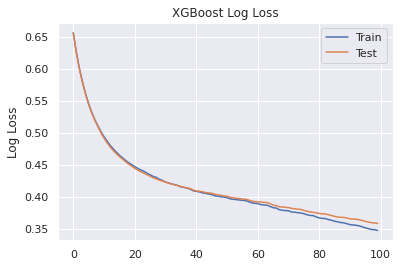

In [ ]:
from matplotlib import pyplot
model = XGBClassifier()
eval_set = [(X_train, y_train), (X_test, y_test)]
model.fit(X_train, y_train, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost Log Loss')
pyplot.show()

In [ ]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train,y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)

[0]	validation_0-logloss:0.655314
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.624532
[2]	validation_0-logloss:0.599087
[3]	validation_0-logloss:0.57786
[4]	validation_0-logloss:0.560031
[5]	validation_0-logloss:0.543987
[6]	validation_0-logloss:0.530893
[7]	validation_0-logloss:0.519555
[8]	validation_0-logloss:0.509776
[9]	validation_0-logloss:0.500093
[10]	validation_0-logloss:0.49161
[11]	validation_0-logloss:0.484489
[12]	validation_0-logloss:0.477844
[13]	validation_0-logloss:0.472186
[14]	validation_0-logloss:0.467362
[15]	validation_0-logloss:0.462977
[16]	validation_0-logloss:0.45911
[17]	validation_0-logloss:0.454925
[18]	validation_0-logloss:0.451294
[19]	validation_0-logloss:0.448014
[20]	validation_0-logloss:0.444742
[21]	validation_0-logloss:0.441634
[22]	validation_0-logloss:0.439245
[23]	validation_0-logloss:0.436846
[24]	validation_0-logloss:0.434685
[25]	validation_0-logloss:0.432125
[26]	validation_0-logloss:0.429849


XGBClassifier()

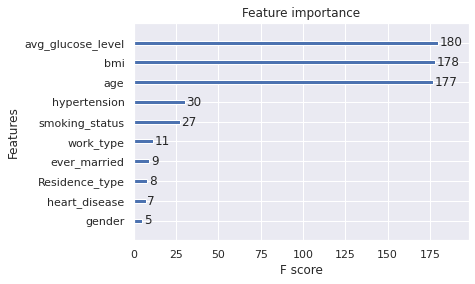

<Figure size 2160x3240 with 0 Axes>

In [ ]:
from xgboost import plot_importance
from matplotlib import pyplot
plot_importance(model)
plt.figure(figsize=(30,45))
pyplot.show()

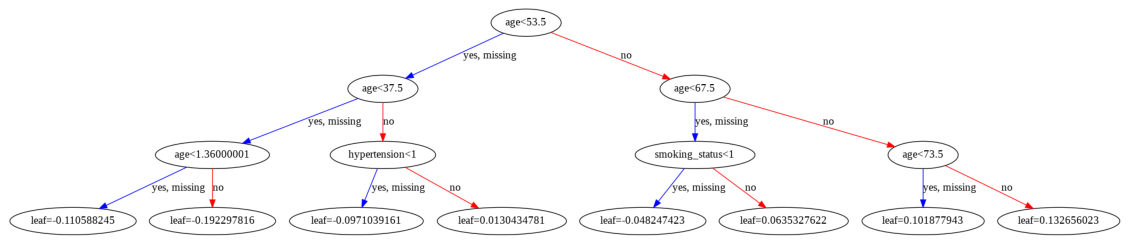

In [ ]:
import xgboost as xgb
plt.figure(figsize=(20,20))
xgb.plot_tree(model, ax=plt.gca());

#Logistic Regression

In [ ]:
y_pred = lr.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.80      0.74      0.77       988
           1       0.75      0.82      0.78       957

    accuracy                           0.77      1945
   macro avg       0.78      0.78      0.77      1945
weighted avg       0.78      0.77      0.77      1945



Text(0.5, 1.0, 'Accuracy Score: 77.48071979434448')

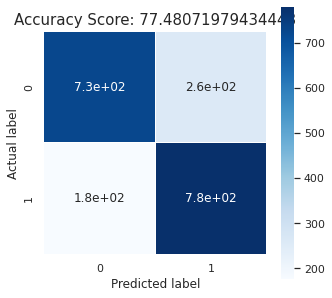

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(lr.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

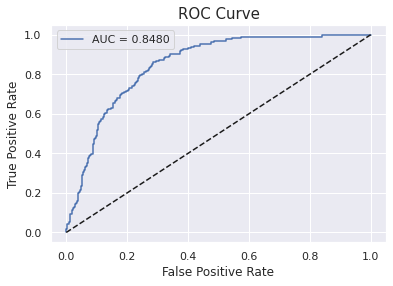

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = lr.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:
y_pred_prob = lr.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of dont have stroke', 'Prob of have stroke'])
y_pred_prob_df

,Prob of dont have stroke,Prob of have stroke
0,0.660099,0.339901
1,0.857559,0.142441
2,0.190897,0.809103
3,0.404390,0.595610
4,0.973273,0.026727
5,0.650847,0.349153
6,0.448314,0.551686
7,0.337225,0.662775
8,0.463951,0.536049
9,0.883201,0.116799


Text(0, 0.5, 'Frequency')

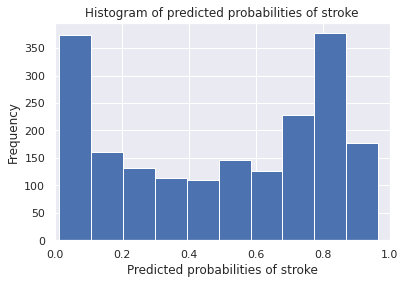

In [ ]:
y_pred1 = lr.predict_proba(X_test)[:, 1]
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of stroke')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of stroke')
plt.ylabel('Frequency')

#Predicting Stroke by Inputing number (Value)

In [ ]:
Xnew = [[1, 50, 0, 1, 0, 3, 1, 140, 25, 2]]
y_pred_prob2 = lr.predict_proba(Xnew)
y_pred_prob_df2 = pd.DataFrame(data=y_pred_prob2, columns=['Prob of dont have stroke', 'Prob of have stroke'])
y_pred_prob_df2

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


,Prob of dont have stroke,Prob of have stroke
0,0.425317,0.574683


#Random Forest

In [ ]:
y_pred = rfc.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       988
           1       0.98      1.00      0.99       957

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



Text(0.5, 1.0, 'Accuracy Score: 98.92030848329048')

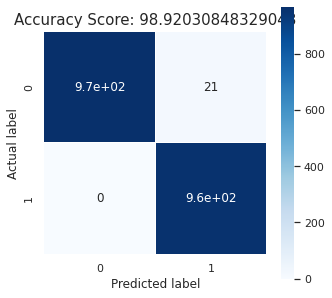

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rfc.score(X_test, y_test)*100)
plt.title(all_sample_title, size = 15)

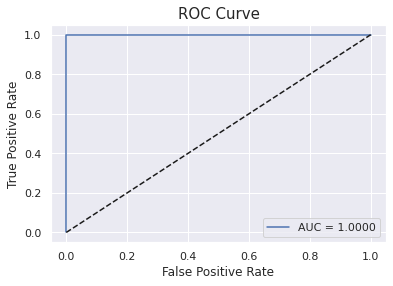

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]
df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index
fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

In [ ]:
#Feature Importance
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
imp_df.sort_values(by="Importance", ascending=False)

,Feature Name,Importance
1,age,0.398422
7,avg_glucose_level,0.199334
8,bmi,0.176850
9,smoking_status,0.051561
5,work_type,0.046476
4,ever_married,0.035515
2,hypertension,0.028047
0,gender,0.022215
6,Residence_type,0.021167
3,heart_disease,0.020412


In [ ]:
y_pred_prob = rfc.predict_proba(X_test)[0:10]
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of dont have stroke', 'Prob of have stroke'])
y_pred_prob_df

,Prob of dont have stroke,Prob of have stroke
0,0.93,0.07
1,1.00,0.00
2,0.00,1.00
3,0.94,0.06
4,1.00,0.00
5,0.99,0.01
6,0.89,0.11
7,0.91,0.09
8,0.00,1.00
9,1.00,0.00


Text(0, 0.5, 'Frequency')

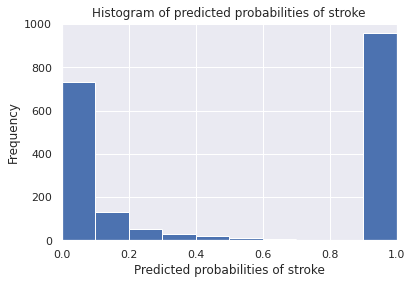

In [ ]:
y_pred2 = rfc.predict_proba(X_test)[:, 1]
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred2, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of stroke')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of stroke')
plt.ylabel('Frequency')

#Predicting Stroke by Inputing number (Value)

In [ ]:
Xnew2 = [[1, 70, 1, 1, 0, 3, 1, 100, 40, 2]]
y_pred_prob3 = rfc.predict_proba(Xnew2)
y_pred_prob_df3 = pd.DataFrame(data=y_pred_prob3, columns=['Prob of dont have stroke', 'Prob of have stroke'])
y_pred_prob_df3

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


,Prob of dont have stroke,Prob of have stroke
0,0.69,0.31


In [ ]:
# Taking input from the user
gender = input("Your Gender (0 = Female, 1 = Male) : ")
age = input("Your Age : ")
hypertension = input("Do you have hypertension ? (0 = No, 1 = Yes) : ")
heart = input("Do you have heart disease ? (0 = No, 1 = Yes) :")
marry = input("Did you ever married ? (0 = No, 1 = Yes) :")
work = input("Your Worktype ? (0 = children, 1 = Government job, 2 = Never worked, 3 = Private, 4 = Self Employed) : ")
residence = input("Your Residence type ? (0 = Rural, 1 = Urban) : ")
avg = input("Average Glucose Level : ")
bmi = input("Your BMI : ")
smoke = input("Your Smoking status ? (0 = never smoked, 1 = formerly smoked, 2 = smokes, 3 = unknown) : ")

Xnew3 = [[gender, age, hypertension, heart, marry, work, residence, avg, bmi, smoke]]


y_pred_prob4 = rfc.predict_proba(Xnew3)
y_pred_prob_df4 = pd.DataFrame(data=y_pred_prob4, columns=['Prob of dont have stroke', 'Prob of have stroke'])
y_pred_prob_df4

Your Gender (0 = Female, 1 = Male) : 1
Your Age : 21
Do you have hypertension ? (0 = No, 1 = Yes) : 0
Do you have heart disease ? (0 = No, 1 = Yes) :0
Did you ever married ? (0 = No, 1 = Yes) :0
Your Worktype ? (0 = children, 1 = Government job, 2 = Never worked, 3 = Private, 4 = Self Employed) : 4
Your Residence type ? (0 = Rural, 1 = Urban) : 1
Average Glucose Level : 109
Your BMI : 15
Your Smoking status ? (0 = never smoked, 1 = formerly smoked, 2 = smokes, 3 = unknown) : 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


,Prob of dont have stroke,Prob of have stroke
0,0.99,0.01
